## <span style="color:green">1. Descargar los datos 📉</span>



In [50]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Visualiza el DataFrame
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


metrica                         |                      Representación conceptual                                |  Foco principal
--------------------------------|-------------------------------------------------------------------------------|-------------------
Exactitud (Accuracy/Asertividad)|  Proporción de todas las predicciones correctas sobre el total de casos       | Ver el rendimiento general del modelo
Precisión                       |  De todo lo que se predijo como positivo ¿Qué fracción es realmente correcta  | Falsos positivos
Recall                          |  De todo lo que era relamente positivo                                        | Falsos negativos


##### Formulas
    Exactitud: nº total de clasificados correctamente de todos los individuos/ nº total de todas las entidades.
    Precisión: nº total de entidades positivas bien clasificadas / nº total de entidades positivas.
    Recall: nº total de clasificados correctamente de un único individuo / nº total de entidades de ese mismo individuo.


##### Abreviaturas comunes
    Tp --> Verdadero Positivo --> El modelo acierta: predice "SI" y es "SI"
    TN --> Verdadero Negativo --> El modelo acierta: predice "NO" y es "NO"
    FP --> Falso Positivo     --> El modelo se equivoca: predice "SI" y es "NO"
    FN --> Falso Negativo     --> El modelo se equivoca: predice "NO" y es "SI"

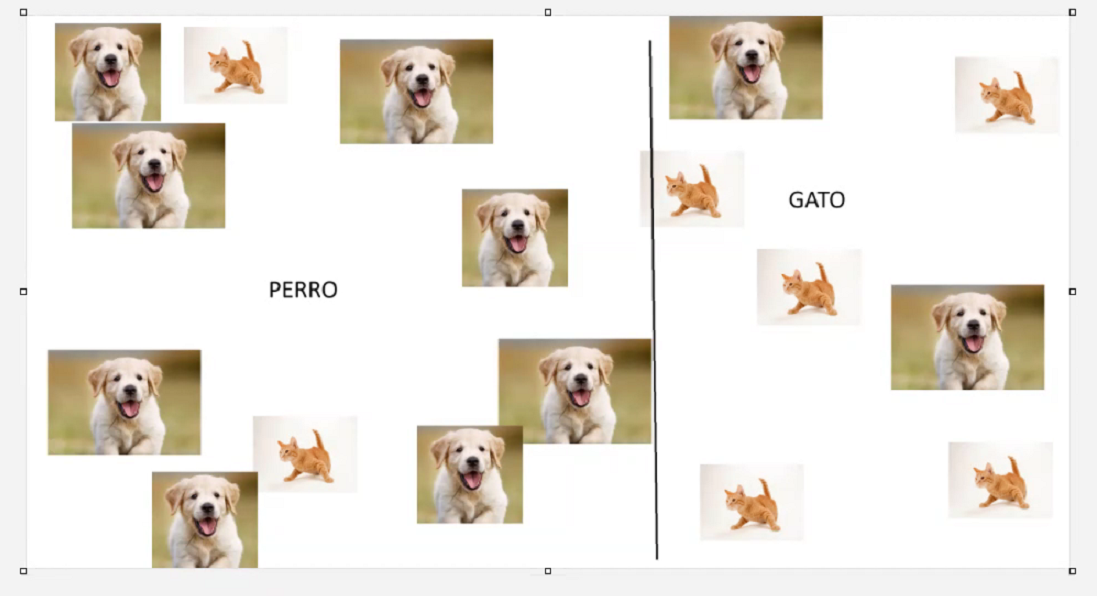

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [53]:
df.min()

age                18
job            admin.
marital      divorced
education     primary
default            no
balance         -6847
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            2
campaign            1
pdays              -1
previous            0
poutcome      failure
deposit            no
dtype: object

In [54]:
df.max()


age               95
job          unknown
marital       single
education    unknown
default          yes
balance        81204
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        3881
campaign          63
pdays            854
previous          58
poutcome     unknown
deposit          yes
dtype: object

## <span style="color:green">2. Análisis de cada Variable</span>

Max Age: 95
Min Age: 18


<Figure size 900x500 with 0 Axes>

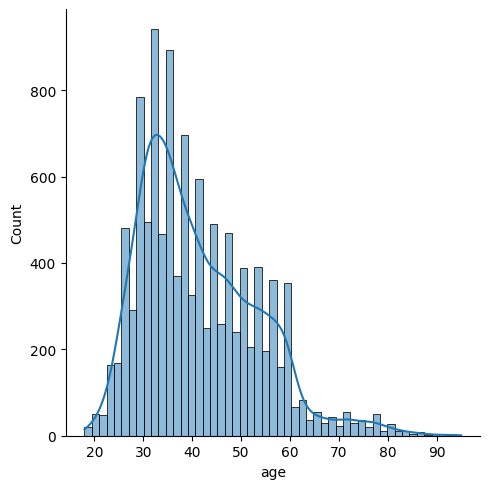

In [55]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns

print("Max Age:", df['age'].max())
print("Min Age:", df['age'].min())
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize=(9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.age,kde=True)

In [56]:
# Género: cuenta cuántos trabajos hay
df["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='Count'>

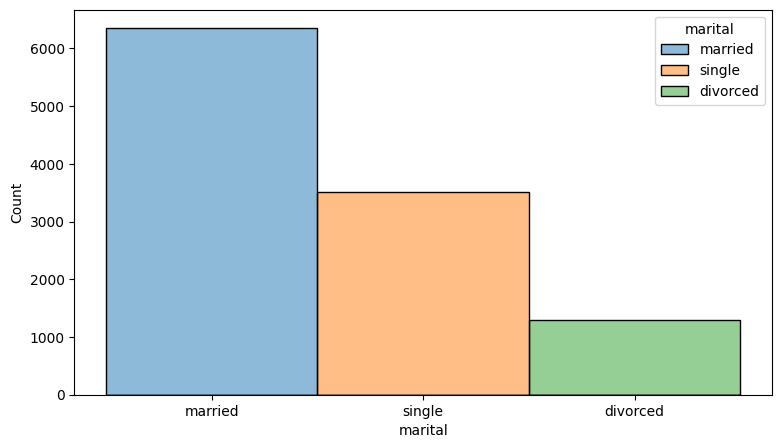

In [57]:
# Crea una gráfica de barras para el estado civil
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="marital", hue="marital")

<Axes: xlabel='education', ylabel='Count'>

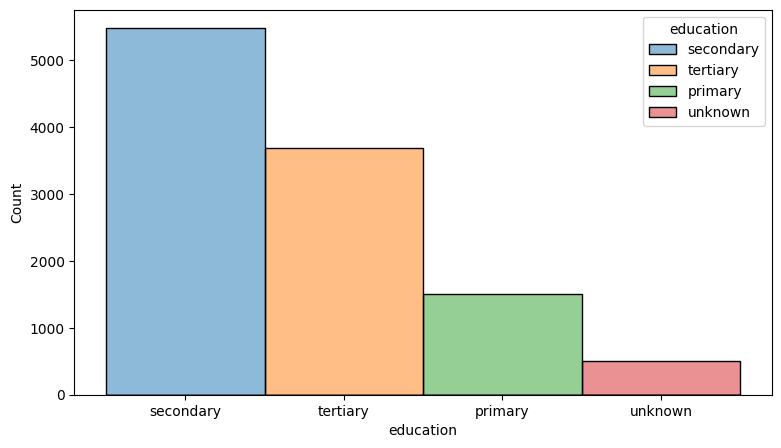

In [58]:
# Crea una gráfica de barras para la educación
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="education", hue="education")

<Figure size 900x500 with 0 Axes>

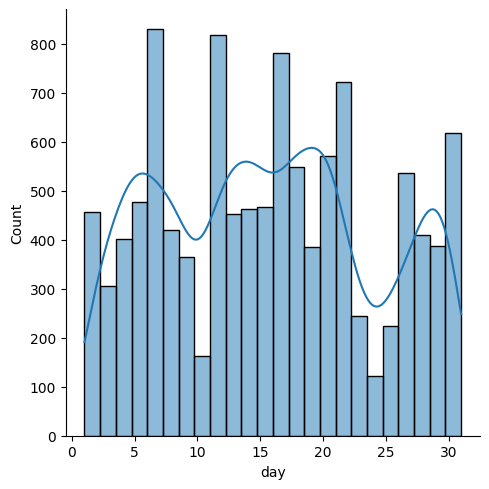

In [59]:
# Crea un displot para los años del cliente
plt.figure(figsize=(9,5))
sns.displot(df.day,kde=True)

<Axes: xlabel='housing', ylabel='Count'>

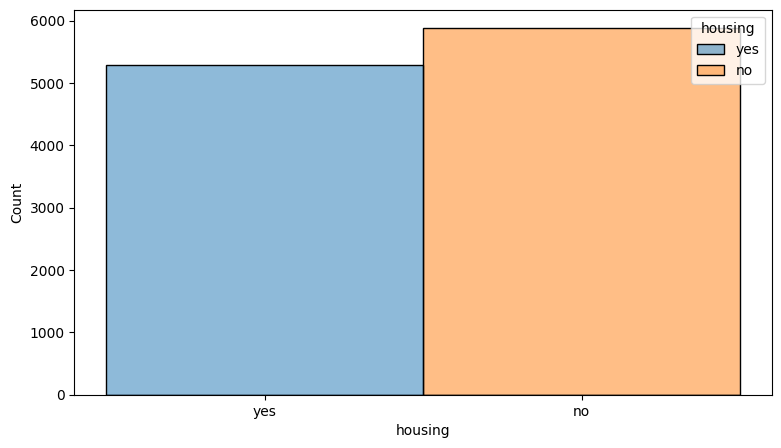

In [60]:
# Crea una gráfica de barras para la gente con casa
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="housing", hue="housing")

<Axes: xlabel='deposit', ylabel='Count'>

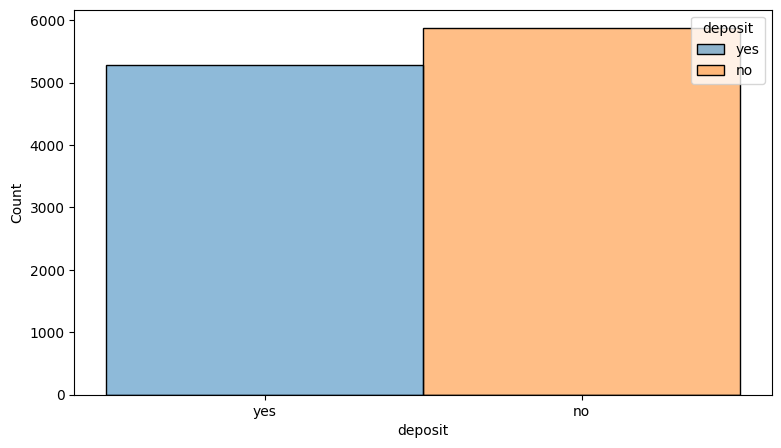

In [61]:
# Crea una gráfica de barras para quien ha realizado un depósito
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="deposit", hue="deposit")

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Deposit vs Housing')

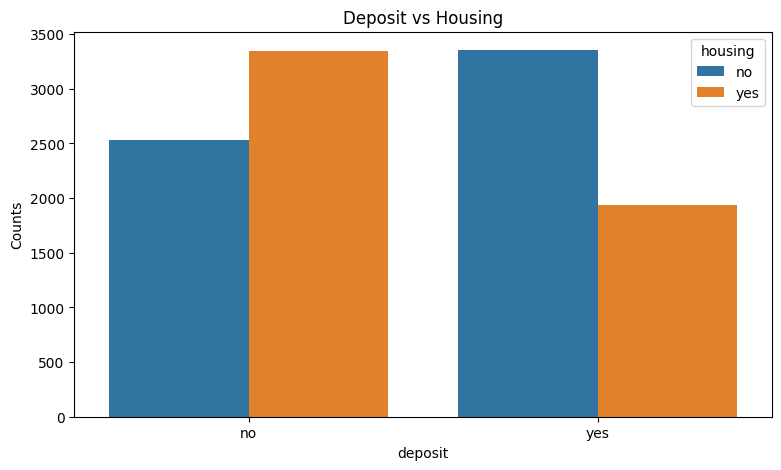

In [62]:
# Grafica la relación entre Housing y Deposit
#Primero armar una tablita para poder graficarlas
df_Housing_Deposit = df.groupby(['housing','deposit']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="deposit", y ="Counts", hue ="housing", data =df_Housing_Deposit)
plt.title("Deposit vs Housing")

Text(0.5, 1.0, 'Deposit vs Marital')

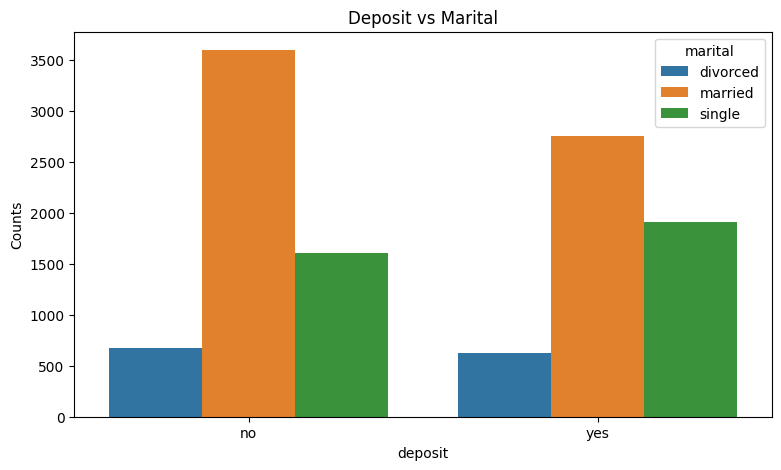

In [63]:
# Grafica la relación entre Deposit y Marital
#Primero armar una tablita para poder graficarlas
df_Marital_Deposit = df.groupby(['marital','deposit']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="deposit", y ="Counts", hue ="marital", data =df_Marital_Deposit)
plt.title("Deposit vs Marital")

Text(0.5, 1.0, 'Deposit vs Job')

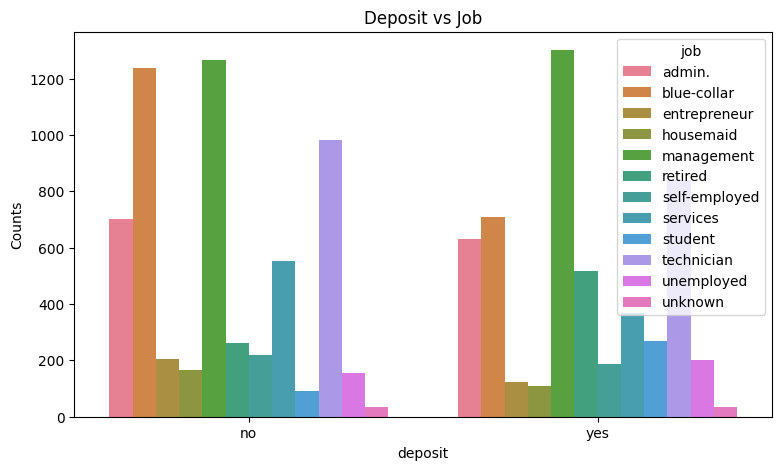

In [64]:
# Grafica la relación entre Deposit y Job 
#Primero armar una tablita para poder graficarlas
df_Job_Deposit = df.groupby(['job','deposit']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="deposit", y ="Counts", hue ="job", data =df_Job_Deposit)
plt.title("Deposit vs Job")

Text(0.5, 1.0, 'Deposit vs Education')

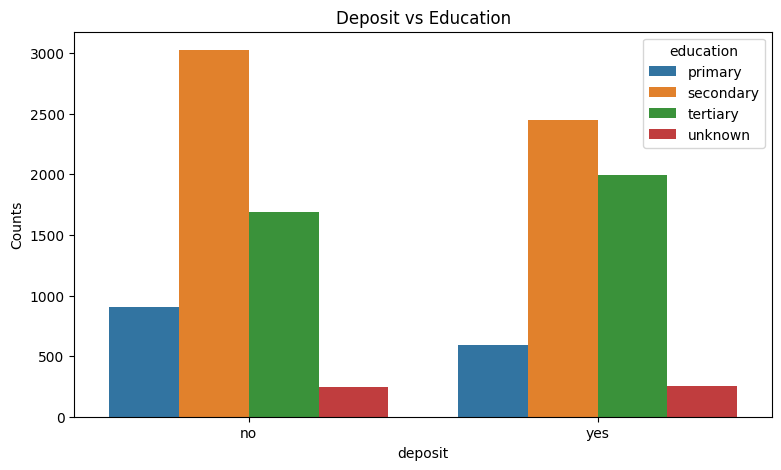

In [65]:
# Grafica la relación entre Education Y Deposit
#Primero armar una tablita para poder graficarlas
df_Education_Deposit = df.groupby(['education','deposit']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="deposit", y ="Counts", hue ="education", data =df_Education_Deposit)
plt.title("Deposit vs Education")

C:\Users\Techie10\AppData\Local\Temp\ipykernel_12896\3650151067.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Education_Loan = df.groupby(['Media_años','deposit']).size().reset_index(name='Counts')


Text(0.5, 1.0, 'Deposit vs Age')

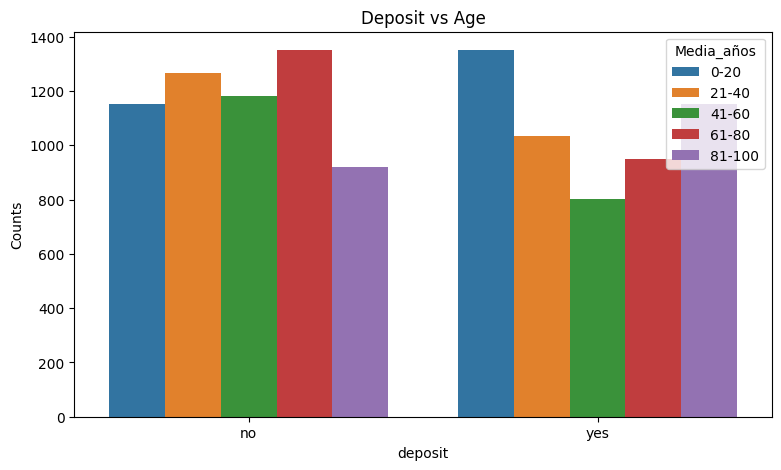

In [66]:
#Graficala relación entre Edad y Deposit 
#Primero armar una tablita para poder graficarlas
df['Media_años'] = pd.qcut(df['age'], q=5, labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

df_Education_Loan = df.groupby(['Media_años','deposit']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="deposit", y ="Counts", hue ="Media_años", data =df_Education_Loan)
plt.title("Deposit vs Age")


Text(0.5, 1.0, 'Deposit vs Month')

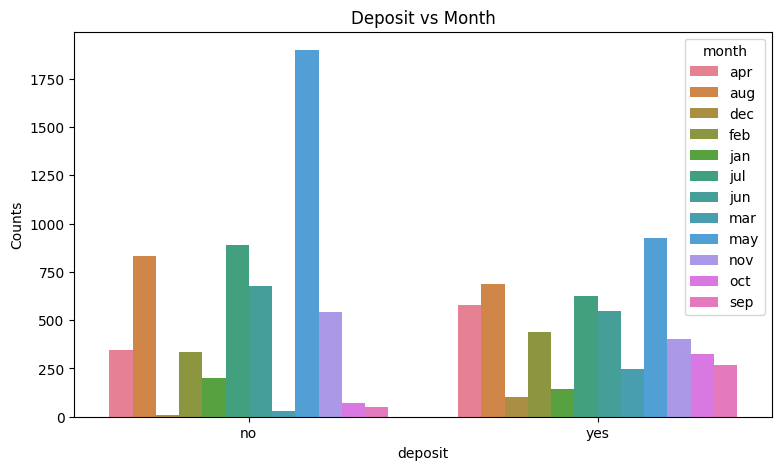

In [67]:
# Grafica la relación entre la Month Y Deposit
#Primero armar una tablita para poder graficarlas
df_Month_Deposit = df.groupby(['month','deposit']).size().reset_index(name='Counts')
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="deposit", y ="Counts", hue ="month", data =df_Month_Deposit)
plt.title("Deposit vs Month")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [68]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder #Funciona como ordinal encoder pero sin darle importancia al orden alfabéto de los datos, simplemente los convierte en números los nuemera por índice

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["marital","housing","deposit","job","education","loan","month","default","contact","poutcome"]

for l in variables:
    label_encoder(l)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Media_años
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,81-100
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,81-100
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,41-60
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,81-100
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,81-100


In [69]:
df =df.drop("Media_años", axis=1) #Nos sobra esta columna

In [70]:
# Crear set de entrenamiento y set de prueba
x = df.drop("deposit", axis=1) #Variables independientes
y = df["deposit"]               #Variable dependiente

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11,shuffle=True)



El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=11

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [71]:
y_train_y = (y_train ==0)

y_test_y = (y_test ==0)

In [72]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=11)
sgd.fit(x_train, y_train_y)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
#Predecir el deposito a tomar de un humano que ya sepas el resultado 
sgd.predict([x_train.iloc[0]]),y_train_y.iloc[0] #Sacará verdadero o falso dependiencdo si se le da  o no

c:\Users\Techie10\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(array([ True]), np.True_)

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [74]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, x_train, y_train_y, scoring='accuracy', cv=3) #3 valores, porque se ha entranado 3 veces cada vez con un trozo diferente de los datos como validación. Sacando el dato de porcentaje de exactitud o de acierto.

array([0.56567014, 0.59106183, 0.54704301])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [75]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)

nunca_c = NuncaC()
cross_val_score(nunca_c, x_train, y_train_y, scoring='accuracy', cv=3) 

array([0.47127981, 0.47278226, 0.47614247])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [76]:
# Matriz de confusión (lo explicado con perros y gatos)
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, x_train, y_train_y, cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_y, y_train_pred)

array([[1908, 2319],
       [1539, 3163]])

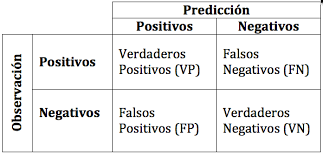

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [77]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
P = precision_score(y_train_y, y_train_pred) #De todas las veces que predijo que era Y, cuántas veces acertó realmente
r = recall_score(y_train_y, y_train_pred)    #De todas las veces que era Y, cuántas veces predijo que era Y
P,r

(0.5769792046698285, 0.6726924712888133)

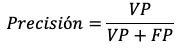

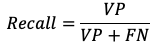

In [78]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11)
rfc.fit(x_train, y_train_y)

#Hacer la matriz de confusión otra vez
y_train_pred = cross_val_predict(rfc, x_train, y_train_y, cv=3)
confusion_matrix(y_train_y, y_train_pred)

array([[3706,  521],
       [ 850, 3852]])

In [79]:
#Calcular la precisión y recall con el nuevo clasificador 
P = precision_score(y_train_y, y_train_pred) #De todas las veces que predijo que era Y, cuántas veces acertó realmente
r = recall_score(y_train_y, y_train_pred)    #De todas las veces que era Y, cuántas veces predijo que era Y
P,r

(0.8808598216327465, 0.8192258613356018)

In [80]:
#Calcular F1
from sklearn.metrics import f1_score
f1_score(y_train_y, y_train_pred)

0.8489256198347107

Métrica F1-score, una medida de clasificadora que combina precisión y recall en un único nº --> "Como de amónicos están la precisión y recall"

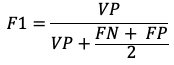

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

Umbral: nº a partir del cual el modelo separa polaridades "esto es positivo". Si la probabilidad > umbral --> positivo, sino --> negativo

In [81]:
#Puntación de un cliente aleatorio
y_score = sgd.decision_function([[25, 0, 0, 2, 1,2,0,0,1,0,1,0,2,2,1,1]])
y_score

c:\Users\Techie10\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([19713.65384486])

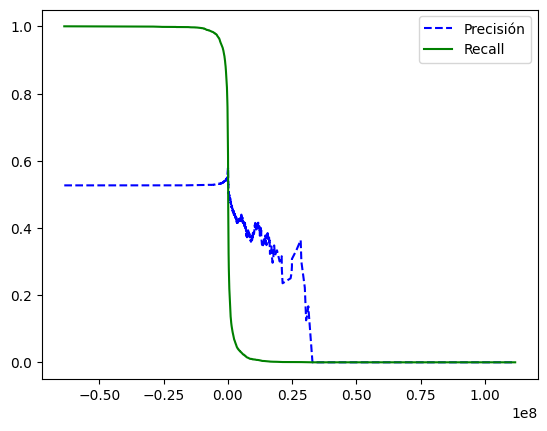

In [82]:
#Graficar la precisión y recall 
y_scores = cross_val_predict(sgd, x_train, y_train_y, cv=3, method="decision_function")
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)
plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.show()

***

### <span style="color:blue">6.5 Curva ROC</span> (Característica Operativa del receptor)


Grafica Recall contra el porcentaje de Falsos Positivos

In [83]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales_roc = roc_curve(y_train_y, y_scores)

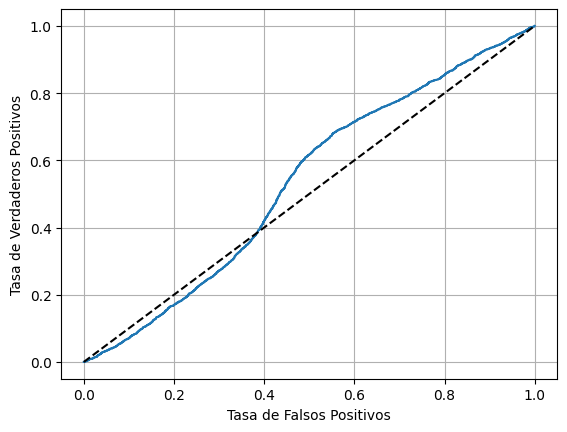

In [84]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label="Curva ROC")
plt.plot([0,1],[0,1],'k--') #Línea diagonal
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC (Formando un triángulo rectángulo) y la línea punteada porque existe una mayor área bajo la curva. Entonces, lo que hay que intentar sacar ahora es el mejor modelo con lo que tenemos.

    El modelo que tenga mayor area bajo la curva será el mejor modelo (Y es lo siguiente que hacemos)

In [85]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y, y_scores)

0.5333265007506282

In [ ]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc, x_train, y_train_y, cv=3, method="predict_proba")
y_scores_forest = y_forest[:,1] #Solo nos quedamos con la probabilidad de que sea 1 

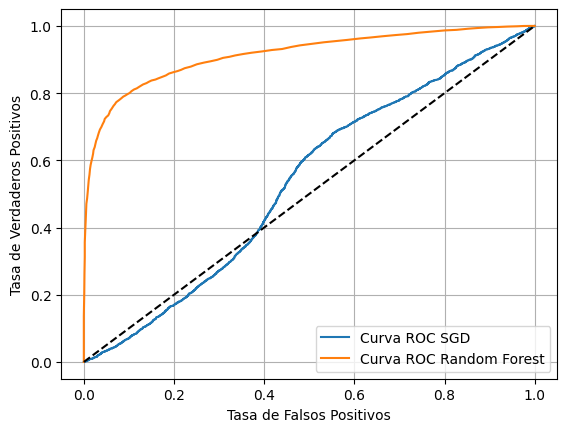

In [87]:
#Graficar la curva ROC y la predicción de random forest 
fpr_forest, tpr_forest, umbrales_roc_forest = roc_curve(y_train_y, y_scores_forest)
plt.plot(fpr, tpr, label="Curva ROC SGD")
plt.plot(fpr_forest, tpr_forest, label="Curva ROC Random Forest")
plt.plot([0,1],[0,1],'k--') #Línea diagonal
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.grid()
plt.show()

In [88]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y, y_scores_forest)

0.9148263724007129

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [89]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
sample = pd.DataFrame([[25, 0, 0, 2, 1,2,0,0,1,0,1,0,2,2,1,1]], columns=x_train.columns)
svm.predict(sample)

array([0])

In [ ]:
#Utilizar decision_function para observar los puntajes de cada deposito 
svm.decision_function(sample)
#Decidirá por el qué tenga mayor puntaje

array([-1.8512265])

In [91]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC())
svm.fit(x_train, y_train)
#Predecir a un humano ahora con este clasificador
svm.predict(sample)

array([0])

In [ ]:
#Utilizar decision_function para observar los puntajes de cada deposito 
svm.decision_function(sample)

array([-1.8512265])

In [93]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.fit(x_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [94]:
sgd.predict(sample)

array([0])

***

## <span style="color:green">8. Analizar Errores</span>

In [95]:
#Hacer un clasificador de random forest
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [96]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
cnf_mz = confusion_matrix(y_train, y_train_pred)
cnf_mz #Los números fuera de la diagonal son los falsos positivos

array([[3883,  819],
       [ 555, 3672]])

In [97]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
cnf_mz_sgd = confusion_matrix(y_train, y_train_pred)
cnf_mz_sgd

array([[3163, 1539],
       [2319, 1908]])

Hay algunos fallos pero al operar todo correctamente entendemos que es por falta de datos